In [34]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
# Display the data table for preview
pyber_data_complete.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

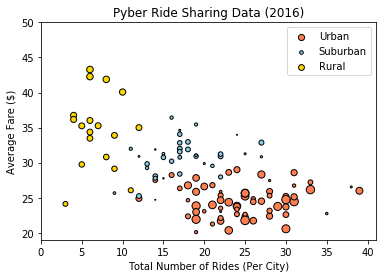

In [35]:
# Obtain the x and y coordinates for each of the three city types

urban_rides_df = pyber_data_complete.loc [pyber_data_complete["type"] == 'Urban']
urban_ride_count = urban_rides_df.groupby(['city']).count()['ride_id']
urban_avg_fare = urban_rides_df.groupby(['city']).mean()['fare']
urban_driver_count = urban_rides_df.groupby(['city']).mean()['driver_count']

x1 = urban_ride_count
y1 = urban_avg_fare
s1 = urban_driver_count


suburban_rides_df = pyber_data_complete.loc [pyber_data_complete["type"] == 'Suburban']
suburban_ride_count = suburban_rides_df.groupby(['city']).count()['ride_id']
suburban_avg_fare = suburban_rides_df.groupby(['city']).mean()['fare']
suburban_driver_count = suburban_rides_df.groupby(['city']).mean()['driver_count']

x2 = suburban_ride_count
y2 = suburban_avg_fare
s2 = suburban_driver_count


rural_rides_df = pyber_data_complete.loc [pyber_data_complete["type"] == 'Rural']
rural_ride_count = rural_rides_df.groupby(['city']).count()['ride_id']
rural_avg_fare = rural_rides_df.groupby(['city']).mean()['fare']
rural_driver_count = rural_rides_df.groupby(['city']).mean()['fare']

x3 = rural_ride_count
y3 = rural_avg_fare
s3 = rural_driver_count


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.ylim(19, 50)
plt.xlim(0, 41)
U = plt.scatter(x1, y1, s = s1, marker="o", facecolors="coral", edgecolors="black")
S = plt.scatter(x2, y2, s = s2, marker="o", facecolors="SkyBlue", edgecolors="black")
R = plt.scatter(x3, y3, s = s3, marker="o", facecolors="Gold", edgecolors="black")

           


plt.legend(('Urban', 'Suburban', 'Rural',),
           loc = "upper right")
# plt.legend(U, S, R),, 
# (('Urban', 'Suburban', 'Rural'),
# scatterpoints = 1,
# loc='lower left',
# ncol=3,
# fontsize=8)
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/pyber.png")
plt.show

## Total Fares by City Type

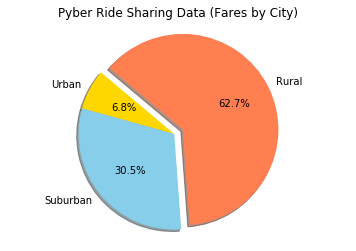

In [50]:
# Calculate Type Percents
fare_sum = pyber_data_complete.groupby('type').sum()['fare']
 
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = fare_sum
colors = ["gold", "skyblue", "coral"]
explode = [0, 0, 0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.title("Pyber Ride Sharing Data (Fares by City)")
plt.savefig("../Images/pyber.png")
plt.show()

## Total Rides by City Type

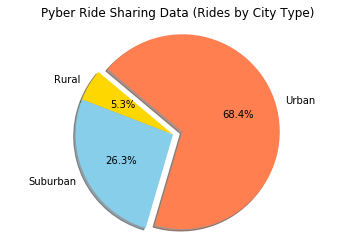

In [51]:
# Calculate Type Percents
ride_count_urban = pyber_data_complete.groupby('type').count()['ride_id']

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = ride_count_urban 
colors = ["gold", "skyblue", "coral"]
explode = [0, 0, 0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.title("Pyber Ride Sharing Data (Rides by City Type)")
plt.savefig("../Images/pyber.png")
plt.show()

## Total Drivers by City Type

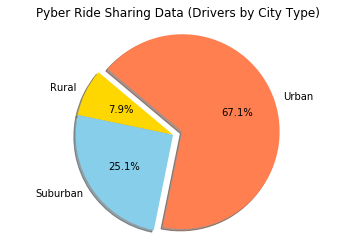

In [52]:

# Calculate Type Percents
ride_count_urban = pyber_data_complete.groupby('type').mean()['driver_count']

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = ride_count_urban
colors = ["gold", "skyblue", "coral"]
explode = [0, 0, 0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
# Save Figure
plt.title("Pyber Ride Sharing Data (Drivers by City Type)")
plt.savefig("../Images/pyber.png")
plt.show()